## Looping and Convergence

In [1]:
import tensorflow as tf

x = tf.Variable(0, name='x')

model = tf.global_variables_initializer()

with tf.Session() as sess:
    for i in range(5):
        sess.run(model)
        x = x + 1
        print(sess.run(x))

1
2
3
4
5


In [9]:
import tensorflow as tf

x = tf.Variable(0, name='x')
threshold = tf.constant(5)

model = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(model)
    
    while sess.run(tf.less(x, threshold)):
        x = x + 1
        x_value = sess.run(x)
        print(x_value)

1
2
3
4
5


## Gradient Descent

In [14]:
import tensorflow as tf
import numpy as np

# x and y are placeholders for our training data
x = tf.placeholder('float')
y = tf.placeholder('float')

# w is the variable storing our values. It it initialised with starting 'guesses'
w = tf.Variable([1.0, 2.0], name='w')

# Our model of y = a*x + b
y_model = tf.mul(x, w[0]) + w[1]

# Our error is defined as the square of the difference
error = tf.square(y - y_model)

# The Gradient Descent Optimizer does the heavy lifting
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)

# Normal Tensorflow - initializer values, create a session and run the model
model = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(model)
    
    for i in range(1000):
        x_value = np.random.rand()
        y_value = x_value * 2 + 6
        
        sess.run(train_op, feed_dict={x:x_value, y:y_value})
        
    w_value = sess.run(w)
    print('Predicted model: {a: .3f}x + {b: .3f}'.format(a=w_value[0], b=w_value[1]))

Predicted model:  2.249x +  5.873


## Plotting the error

Predicted model:  2.017x +  5.908


C:\Users\james\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\james\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


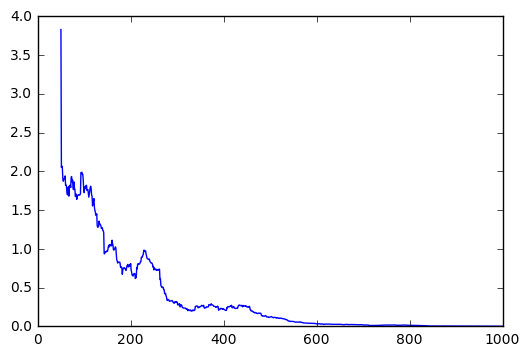

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# x and y are placeholders for our training data
x = tf.placeholder('float')
y = tf.placeholder('float')

# w is the variable storing our values. It it initialised with starting 'guesses'
w = tf.Variable([1.0, 2.0], name='w')

# Our model of y = a*x + b
y_model = tf.mul(x, w[0]) + w[1]

# Our error is defined as the square of the difference
error = tf.square(y - y_model)

# The Gradient Descent Optimizer does the heavy lifting
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)

# Normal Tensorflow - initializer values, create a session and run the model
model = tf.global_variables_initializer()

errors = []
with tf.Session() as sess:
    sess.run(model)
    
    for i in range(1000):
        x_train = tf.random_normal((1,),mean=5, stddev=2.0)
        y_train = x_train * 2 + 6
        x_value,y_value = sess.run([x_train, y_train])
        
        _, error_value = sess.run([train_op, error], feed_dict={x:x_value, y:y_value})        
        sess.run(train_op, feed_dict={x:x_value, y:y_value})
        
        errors.append(error_value)
        
    w_value = sess.run(w)
    print('Predicted model: {a: .3f}x + {b: .3f}'.format(a=w_value[0], b=w_value[1]))

plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

## Exercise

2) Try separate the a and b values from the Gradient Descent example (where w is used).

Predicted model:  2.322x +  3.614


C:\Users\james\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\james\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


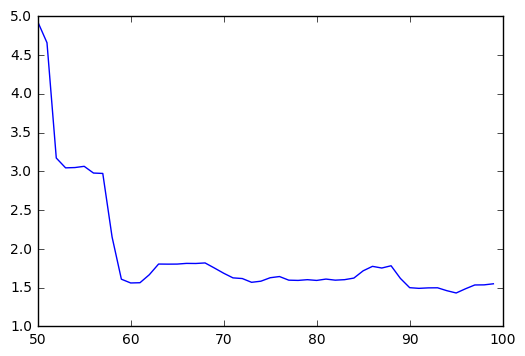

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# x and y are placeholders for our training data
x = tf.placeholder('float')
y = tf.placeholder('float')

# w is the variable storing our values. It it initialised with starting 'guesses'
a = tf.Variable(1.0, name='a')
b = tf.Variable(2.0, name='b')

# Our model of y = a*x + b
y_model = tf.mul(x, a) + b

# Our error is defined as the square of the difference
error = tf.square(y - y_model)

# The Gradient Descent Optimizer does the heavy lifting
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)

# Normal Tensorflow - initializer values, create a session and run the model
model = tf.global_variables_initializer()

errors = []
with tf.Session() as sess:
    sess.run(model)
    
    for i in range(100):
        x_train = tf.random_normal((1,),mean=5, stddev=2.0)
        y_train = x_train * 2 + 6
        x_value,y_value = sess.run([x_train, y_train])
        
        _, error_value = sess.run([train_op, error], feed_dict={x:x_value, y:y_value})        
        sess.run(train_op, feed_dict={x:x_value, y:y_value})
        
        errors.append(error_value)
        
    a_value = sess.run(a)
    b_value = sess.run(b)
    print('Predicted model: {a: .3f}x + {b: .3f}'.format(a=a_value, b=b_value))

plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

3) Our example trains on just a single example at a time, which is inefficient. Extend it to learn using a number (say, 50) of training samples at a time.

Predicted model:  2.556x +  2.660


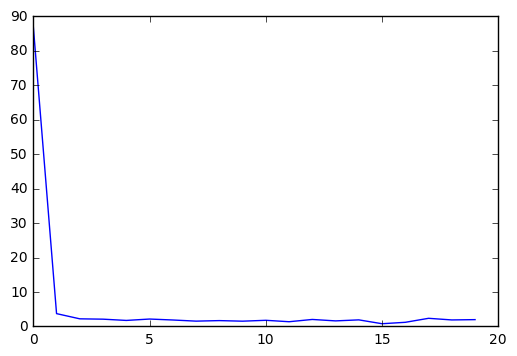

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# x and y are placeholders for our training data
x = tf.placeholder('float', [None, 1])
y = tf.placeholder('float', [None, 1])

# w is the variable storing our values. It it initialised with starting 'guesses'
w = tf.Variable([1.0, 2.0], name='w')

# Our model of y = a*x + b
y_model = tf.mul(x, w[0]) + w[1]

# Our error is defined as the square of the difference
error = tf.reduce_mean(tf.square(y - y_model))

# The Gradient Descent Optimizer does the heavy lifting
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)

# Normal Tensorflow - initializer values, create a session and run the model
model = tf.global_variables_initializer()

batch = 50

errors = []
with tf.Session() as sess:
    sess.run(model)
    
    for i in range(1000 // batch):
        x_train = tf.random_normal((batch,1),mean=5, stddev=2.0)
        y_train = x_train * 2 + 6
        x_value,y_value = sess.run([x_train, y_train])
        
        _, error_value = sess.run([train_op, error], feed_dict={x:x_value, y:y_value})        
        sess.run(train_op, feed_dict={x:x_value, y:y_value})
        
        errors.append(error_value)
        
    w_value = sess.run(w)
    print('Predicted model: {a: .3f}x + {b: .3f}'.format(a=w_value[0], b=w_value[1]))

plt.plot(errors)
plt.show()
